<a href="https://colab.research.google.com/github/philongbuile/houseprice_prediction/blob/main/HCMHousePricePrediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Collect and clean data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sheet_id = "1CocTtmdVwA1RkkSnUQTgX9wyD68og-CUh0VpK5x2R3Q"
sheet_name = "data"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
HCMhousing = pd.read_csv(url)
#HCMhousing = (pd.read_csv(url) [lambda x:x['House_type']==4])
price_range = 20


HCMhousing = HCMhousing.loc[HCMhousing['Price']<price_range]
#       [lambda x: x['B'] > 10])

HCMhousing.head()

,House_type,Area,No_Bedrooms,No_bathrooms,House_law_status,Funiture_score,Total_floor,Coordinates,Price
0,2,53.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95
1,2,38.0,1,1,1,0,1,"10°48'58.1""N 106°42'22.3""E",1.40
2,2,70.0,2,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",2.90
3,2,86.0,3,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",3.70
4,2,50.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95


In [ ]:
ggmap_coor = HCMhousing["Coordinates"]
ggmap_coor

0      10°43'04.9"N 106°44'32.6"E
1      10°48'58.1"N 106°42'22.3"E
2      10°48'58.1"N 106°42'22.3"E
3      10°48'58.1"N 106°42'22.3"E
4      10°43'04.9"N 106°44'32.6"E
                  ...            
629    10°52'32.0"N 106°37'43.5"E
630    10°48'34.3"N 106°48'12.0"E
631    10°44'29.6"N 106°37'07.3"E
632    10°43'57.5"N 106°38'35.2"E
633    10°43'15.6"N 106°39'40.0"E
Name: Coordinates, Length: 509, dtype: object

**Convert longtitude to coordinates**


In [ ]:
import re
import numpy as np



def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'W':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    lng = dms2dd(parts[5], parts[6], parts[7], parts[8])

    return (lat, lng)

new_coor = ggmap_coor.values.tolist()
#dd= parse_dms(new_coor[0])

#print(dd)
#print(dd2dms(dd[0]))
dd = np.ones((len(new_coor),2))

index=0
for row in new_coor:
   dd[index] = parse_dms(row)
   index= index+1

#dd[:,0]
#dd
# (36.9525, -110.07249999999999)
# [36, 57, 9.000000000002046]

Append those to original data

In [ ]:

HCMhousing = HCMhousing.assign(lat=dd[:,0])
HCMhousing = HCMhousing.assign(lng=dd[:,1])
HCMhousing


,House_type,Area,No_Bedrooms,No_bathrooms,House_law_status,Funiture_score,Total_floor,Coordinates,Price,lat,lng
0,2,53.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95,10.717778,106.742222
1,2,38.0,1,1,1,0,1,"10°48'58.1""N 106°42'22.3""E",1.40,10.816111,106.706111
2,2,70.0,2,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",2.90,10.816111,106.706111
3,2,86.0,3,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",3.70,10.816111,106.706111
4,2,50.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95,10.717778,106.742222
...,...,...,...,...,...,...,...,...,...,...,...
629,5,90.0,3,3,2,0,3,"10°52'32.0""N 106°37'43.5""E",8.60,10.875556,106.628611
630,5,103.0,5,5,2,0,3,"10°48'34.3""N 106°48'12.0""E",13.20,10.809444,106.803333
631,5,59.2,1,2,2,0,1,"10°44'29.6""N 106°37'07.3""E",3.40,10.741389,106.618611
632,5,151.0,2,3,1,1,2,"10°43'57.5""N 106°38'35.2""E",7.20,10.732500,106.643056


**One hot encoding the house type**

In [ ]:
house_type_col = HCMhousing["House_type"]
list_house_type = house_type_col.values.tolist()

one_hot_encoding_housetype = np.zeros((len(list_house_type),5))


index=0;
for row in one_hot_encoding_housetype:
  check = list_house_type[index];
  if check == 1:
    row[0] = 1;
  elif check == 2:
    row[1]=1;
  elif check == 3:
    row[2]=1;
  elif check ==4:
    row[3]=1;
  else:
    row[4]=1
  index=index+1


one_hot_encoding_housetype


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
temp = one_hot_encoding_housetype
HCMhousing = HCMhousing.assign(villa=temp[:,0])
HCMhousing = HCMhousing.assign(apartment=temp[:,1])
HCMhousing = HCMhousing.assign(detached=temp[:,2])
HCMhousing = HCMhousing.assign(townhouse=temp[:,3])
HCMhousing = HCMhousing.assign(shophouse=temp[:,4])
HCMhousing

,House_type,Area,No_Bedrooms,No_bathrooms,House_law_status,Funiture_score,Total_floor,Coordinates,Price,lat,lng,villa,apartment,detached,townhouse,shophouse
0,2,53.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95,10.717778,106.742222,0.0,1.0,0.0,0.0,0.0
1,2,38.0,1,1,1,0,1,"10°48'58.1""N 106°42'22.3""E",1.40,10.816111,106.706111,0.0,1.0,0.0,0.0,0.0
2,2,70.0,2,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",2.90,10.816111,106.706111,0.0,1.0,0.0,0.0,0.0
3,2,86.0,3,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",3.70,10.816111,106.706111,0.0,1.0,0.0,0.0,0.0
4,2,50.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95,10.717778,106.742222,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,5,90.0,3,3,2,0,3,"10°52'32.0""N 106°37'43.5""E",8.60,10.875556,106.628611,0.0,0.0,0.0,0.0,1.0
630,5,103.0,5,5,2,0,3,"10°48'34.3""N 106°48'12.0""E",13.20,10.809444,106.803333,0.0,0.0,0.0,0.0,1.0
631,5,59.2,1,2,2,0,1,"10°44'29.6""N 106°37'07.3""E",3.40,10.741389,106.618611,0.0,0.0,0.0,0.0,1.0
632,5,151.0,2,3,1,1,2,"10°43'57.5""N 106°38'35.2""E",7.20,10.732500,106.643056,0.0,0.0,0.0,0.0,1.0


**Delete column House_type**

In [ ]:
HCMhousing = HCMhousing.drop(columns='House_type')
HCMhousing

,Area,No_Bedrooms,No_bathrooms,House_law_status,Funiture_score,Total_floor,Coordinates,Price,lat,lng,villa,apartment,detached,townhouse,shophouse
0,53.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95,10.717778,106.742222,0.0,1.0,0.0,0.0,0.0
1,38.0,1,1,1,0,1,"10°48'58.1""N 106°42'22.3""E",1.40,10.816111,106.706111,0.0,1.0,0.0,0.0,0.0
2,70.0,2,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",2.90,10.816111,106.706111,0.0,1.0,0.0,0.0,0.0
3,86.0,3,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",3.70,10.816111,106.706111,0.0,1.0,0.0,0.0,0.0
4,50.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",1.95,10.717778,106.742222,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,90.0,3,3,2,0,3,"10°52'32.0""N 106°37'43.5""E",8.60,10.875556,106.628611,0.0,0.0,0.0,0.0,1.0
630,103.0,5,5,2,0,3,"10°48'34.3""N 106°48'12.0""E",13.20,10.809444,106.803333,0.0,0.0,0.0,0.0,1.0
631,59.2,1,2,2,0,1,"10°44'29.6""N 106°37'07.3""E",3.40,10.741389,106.618611,0.0,0.0,0.0,0.0,1.0
632,151.0,2,3,1,1,2,"10°43'57.5""N 106°38'35.2""E",7.20,10.732500,106.643056,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Modify the data frame in order to be more comprehensible
price = HCMhousing["Price"];
temp = price.values.tolist()
HCMhousing = HCMhousing.drop(columns='Price');
HCMhousing = HCMhousing.assign(Price=temp)
HCMhousing

,Area,No_Bedrooms,No_bathrooms,House_law_status,Funiture_score,Total_floor,Coordinates,lat,lng,villa,apartment,detached,townhouse,shophouse,Price
0,53.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",10.717778,106.742222,0.0,1.0,0.0,0.0,0.0,1.95
1,38.0,1,1,1,0,1,"10°48'58.1""N 106°42'22.3""E",10.816111,106.706111,0.0,1.0,0.0,0.0,0.0,1.40
2,70.0,2,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",10.816111,106.706111,0.0,1.0,0.0,0.0,0.0,2.90
3,86.0,3,2,1,0,1,"10°48'58.1""N 106°42'22.3""E",10.816111,106.706111,0.0,1.0,0.0,0.0,0.0,3.70
4,50.0,1,1,1,0,1,"10°43'04.9""N 106°44'32.6""E",10.717778,106.742222,0.0,1.0,0.0,0.0,0.0,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,90.0,3,3,2,0,3,"10°52'32.0""N 106°37'43.5""E",10.875556,106.628611,0.0,0.0,0.0,0.0,1.0,8.60
630,103.0,5,5,2,0,3,"10°48'34.3""N 106°48'12.0""E",10.809444,106.803333,0.0,0.0,0.0,0.0,1.0,13.20
631,59.2,1,2,2,0,1,"10°44'29.6""N 106°37'07.3""E",10.741389,106.618611,0.0,0.0,0.0,0.0,1.0,3.40
632,151.0,2,3,1,1,2,"10°43'57.5""N 106°38'35.2""E",10.732500,106.643056,0.0,0.0,0.0,0.0,1.0,7.20


# 2. Visualize data



In [ ]:
HCMhousing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 633
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              509 non-null    float64
 1   No_Bedrooms       509 non-null    int64  
 2   No_bathrooms      509 non-null    int64  
 3   House_law_status  509 non-null    int64  
 4   Funiture_score    509 non-null    int64  
 5   Total_floor       509 non-null    int64  
 6   Coordinates       509 non-null    object 
 7   lat               509 non-null    float64
 8   lng               509 non-null    float64
 9   villa             509 non-null    float64
 10  apartment         509 non-null    float64
 11  detached          509 non-null    float64
 12  townhouse         509 non-null    float64
 13  shophouse         509 non-null    float64
 14  Price             509 non-null    float64
dtypes: float64(9), int64(5), object(1)
memory usage: 63.6+ KB


In [ ]:
#sns.pairplot(HCMhousing)

It should seem like Price has the attribute of linear distribution.

**Then we see the distribution graph of Price**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


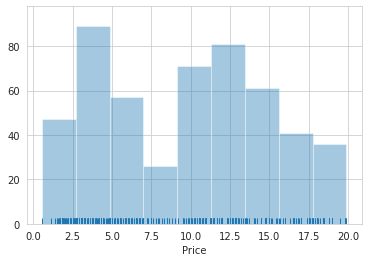

In [ ]:
sns.set_style("whitegrid")
sns.distplot(HCMhousing['Price'], kde = False, rug = "True")

Checking **correlation** by heatmap:

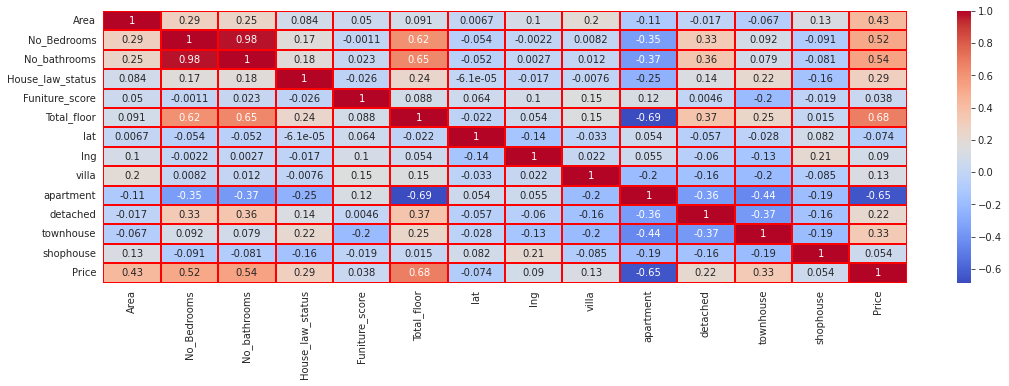

In [ ]:
plt.figure(figsize=(18,5))
sns.heatmap(HCMhousing.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

We could analyze then conclude how correlated within column. Basically, "price" has the most correlation with other column, hence proved that those factors have impact on House Price.

This is a really clean dataset, there are no null or NaN values for us to get hands dirtier.

# 3. Building predicting model with Scikit Learn


a. Split data to train and test

In [ ]:
X = HCMhousing[['Area', 'No_Bedrooms','No_bathrooms', 'House_law_status','Funiture_score','Total_floor','lat','lng','villa','apartment','detached','townhouse','shophouse']]
y = HCMhousing['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

print(X_train)

      Area  No_Bedrooms  No_bathrooms  House_law_status  Funiture_score  \
177   52.0            1             1                 2               1   
375  141.0            6             6                 2               0   
192   90.0            3             3                 1               1   
631   59.2            1             2                 2               0   
551  110.0            4             5                 2               0   
..     ...          ...           ...               ...             ...   
67    71.0            3             2                 2               1   
427  125.0            1             1                 2               0   
438   83.0            5             5                 2               0   
11   109.0            3             2                 2               0   
452  104.0           10            11                 2               0   

     Total_floor        lat         lng  villa  apartment  detached  \
177            1  10.802500 

In [ ]:
print(y_train)

177     3.30
375    12.50
192     3.20
631     3.40
551    12.50
       ...  
67      3.75
427    16.00
438    14.50
11      4.45
452    17.80
Name: Price, Length: 305, dtype: float64


In [ ]:
print(X_test)

       Area  No_Bedrooms  No_bathrooms  House_law_status  Funiture_score  \
34   106.00            3             2                 2               1   
225   95.00            4             4                 2               1   
605  100.00            3             2                 2               0   
112  112.90            1             1                 2               1   
88   127.40            2             2                 2               0   
..      ...          ...           ...               ...             ...   
478   45.00            4             4                 2               1   
597   45.77            2             2                 1               1   
82    82.80            3             2                 2               0   
170   66.00            2             2                 2               0   
134   94.00            3             3                 2               1   

     Total_floor        lat         lng  villa  apartment  detached  \
34             1

**b. Create model and train Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#train
lm.fit(X_train,y_train)


LinearRegression()

**c. Predict and validate model**

Để dự đoán và kiểm tra mô hình, ta sử dụng dữ liệu test bên trên mà ta đã tách ra. Trong đó, X_test là các tính năng mà mô hình chưa biết, y_test là kết quả biết trước để ta so sánh với kết quả dự đoán từ X_test.

Lấy kết quả dự đoán từ X_test, ta dùng phương thức predict() truyền đối số X_test vào

In [ ]:
predictions = lm.predict(X_test)
print(predictions)

[ 5.45952452 11.53178863  8.31623274 10.66880719  9.94717547 13.05953473
  2.37074996 11.25697338  6.00240605 13.02344684 14.00056826  3.4153463
  5.06888776 10.21246855 13.8811717  10.95613334 19.86406957 11.25152659
  5.72621497  8.6151302   5.58960717  5.00385256  2.21813122 13.04099067
  4.36166905 12.48209923 13.45679829 11.1337036  13.62377015  5.61605173
 12.19174447  7.89414133 12.80413335 12.89955522  9.58756416  3.96355208
  4.62628355  4.19695734  7.7700342   6.63375916  9.34931611  6.601889
 10.98617469  9.83332915 14.11443598 12.54584852  3.67739375  5.37273484
 11.10782689 11.91232636 10.74937667  3.65548831  7.22134472 13.14981259
 12.45760274  3.38998512  8.86668873  3.22989791 11.04906483 14.58881301
 12.6194624   9.14401302 12.88802871 17.74326568  3.41389855 14.6349457
  5.98879814 12.02697361 13.91934423 11.76333024  2.8905662  10.90136272
 12.87625117  4.41384479 11.83900619 10.25462345  5.69395864  3.22989791
  3.58007096  3.94426315 11.99123536 13.72978879  6.540

The result of above prediction is an numpy array contains the result of prediction of X_test. 

To validate predictions and original value  (y_test), we can look at the graph

1. Using Scatter to check

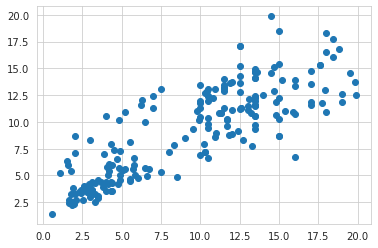

In [ ]:
plt.scatter(y_test,predictions)


2. Using cufflinks

In [ ]:
import cufflinks as cf 
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
pd.DataFrame({"Predicted price":predictions, "Original price": y_test}).iplot(mode="markers")

**3. Checking losses:**

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.193728859920824
MSE: 8.288500488774053
RMSE: 2.8789755971133295


**Validate by using varience score**

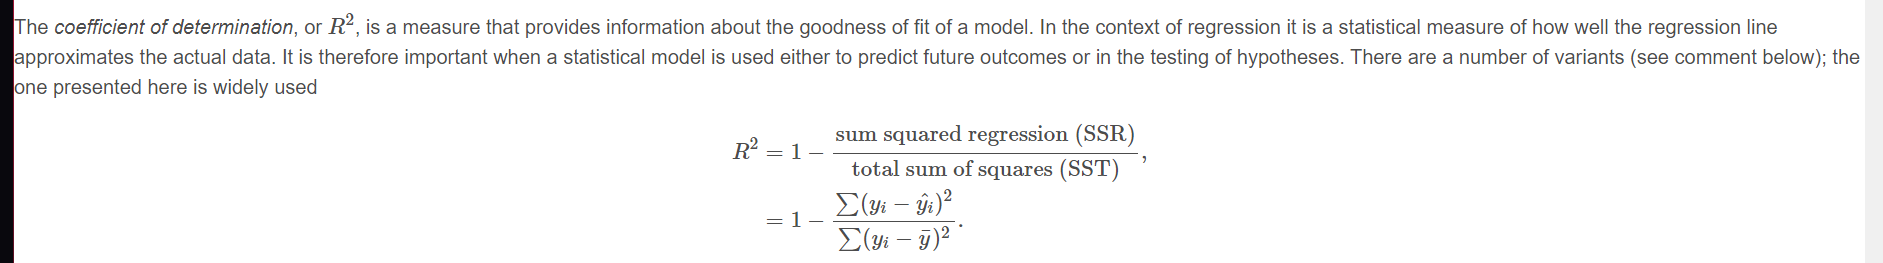

In [ ]:
metrics.r2_score(y_test, predictions)

0.6935148929257076

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Area,0.052176
No_Bedrooms,-0.620865
No_bathrooms,0.700936
House_law_status,0.702621
Funiture_score,0.077983
Total_floor,1.265469
lat,-0.197184
lng,1.650476
villa,-0.092616
apartment,-2.317072


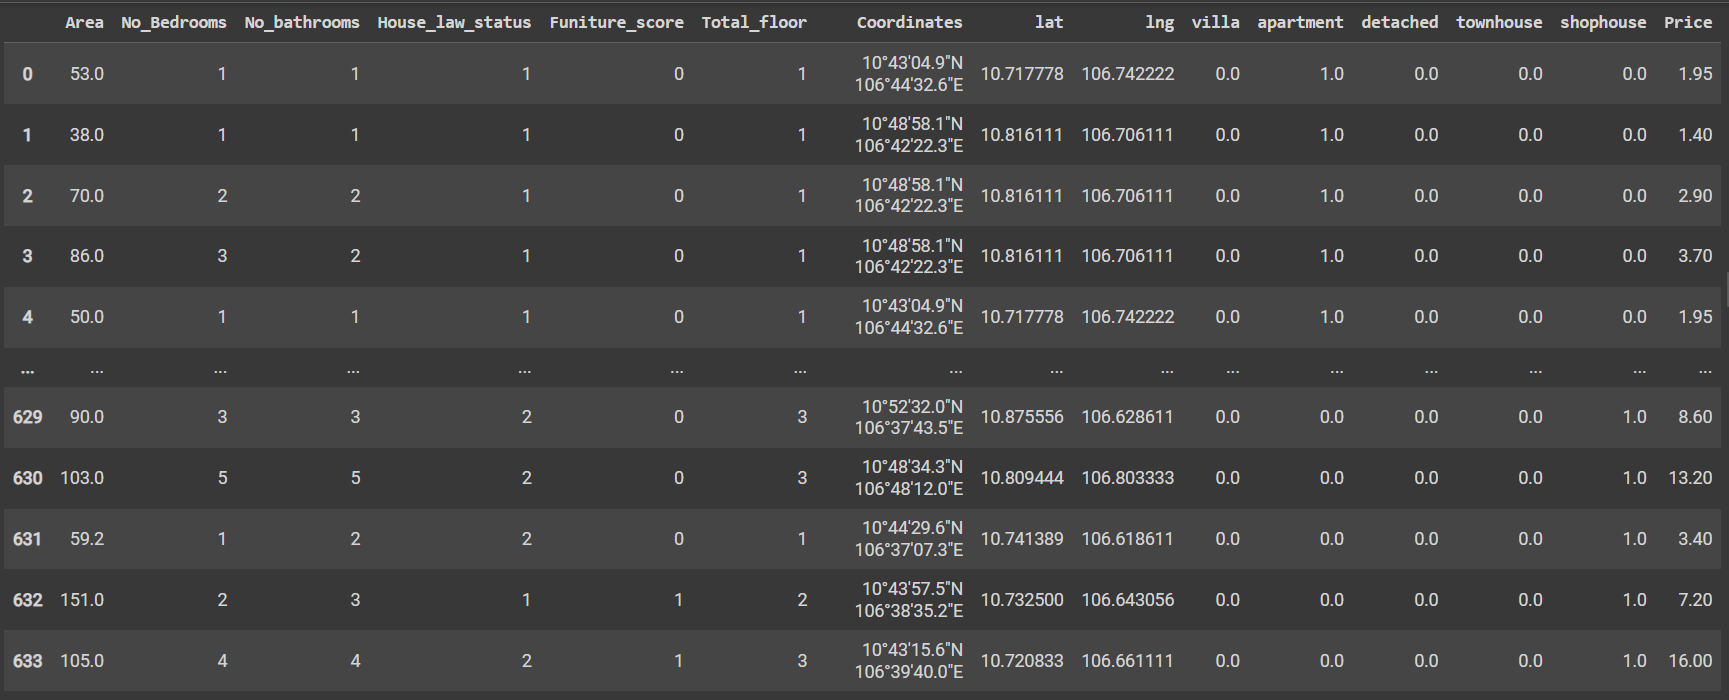

In [ ]:
aud_data = X_test.iloc[[0]]
aud_data['Area'] =70
aud_data['No_Bedrooms'] = 2
aud_data ['Funiture_score'] = 1
aud_data ['Total_floor'] = 1
aud_data['apartment'] = 0
aud_data['villa']=0
aud_data['detached']=0
aud_data['shophouse']=0
aud_data
result = lm.predict(aud_data)
result

array([6.51913445])